In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics

dataset=pd.read_csv("D:\\1_Lecture Material\\Term_2\\Pedram Habibi_Business_Processing\\voice(1).csv")
dataset['label'] = dataset['label'].map({'male': 1, 'female': 0})
print(dataset.columns)
len(dataset.columns)
dataset.shape

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')


(3168, 21)

In [6]:
x = dataset.iloc[:,0:20]
y = dataset.iloc[:,-1]
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
columns=(x_train.columns)
print(x_train)
cols2= ['meanfreq', 'sd', 'skew', 'kurt', 'meanfun', 'minfun', 'maxfun','meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
#cols2= ['meanfreq','sd','skew','kurt', 'meanfun', 'minfun', 'maxfun','meandom','mindom','maxdom', 'dfrange','modindx']
cols1=['sp.ent', 'sfm', 'meanfun', 'minfun', 'maxdom', 'dfrange']
x_train=(x_train1[cols1])
x_test=(x_test1[cols1])


x_train_new=(x_train1[cols2])
x_test_new=(x_test1[cols2])

        sp.ent       sfm   meanfun    minfun     maxdom    dfrange
2311  0.857409  0.211434  0.174002  0.047856   9.937500   9.914062
349   0.921978  0.510190  0.101953  0.051546   3.940430   3.842773
989   0.874688  0.286869  0.131446  0.047291   6.890625   6.867188
2100  0.846709  0.237891  0.170972  0.015779   4.828125   4.773438
1118  0.898586  0.342237  0.134925  0.047714   3.281250   3.257812
1865  0.950413  0.681699  0.212683  0.054054   3.585938   3.570312
704   0.905954  0.439216  0.100917  0.017036   0.766602   0.668945
820   0.931160  0.435852  0.129624  0.046967   6.843750   6.820312
2855  0.808489  0.135079  0.197221  0.051502  11.039062  10.804688
44    0.926522  0.567621  0.101719  0.016000   0.625000   0.617188
615   0.965917  0.729219  0.103969  0.029144   5.421875   5.390625
2278  0.859834  0.219356  0.173614  0.048436   8.625000   8.601562
1424  0.930385  0.451028  0.134565  0.048193   5.601562   5.578125
1338  0.948078  0.620633  0.113783  0.047059   4.218750   4.19

0.9589905362776026


C:\Users\Jigar_PAtel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 15.0, 'Predicted label')

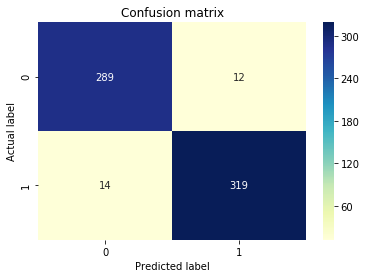

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier = LogisticRegression(random_state=0)

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)



from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(metrics.accuracy_score(y_test, y_pred))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

          meanfreq    sd  median   Q25   Q75   IQR  skew  kurt  sp.ent   sfm  \
meanfreq      1.00 -0.74    0.93  0.91  0.74 -0.63 -0.32 -0.32   -0.60 -0.78   
sd           -0.74  1.00   -0.56 -0.85 -0.16  0.87  0.31  0.35    0.72  0.84   
median        0.93 -0.56    1.00  0.77  0.73 -0.48 -0.26 -0.24   -0.50 -0.66   
Q25           0.91 -0.85    0.77  1.00  0.48 -0.87 -0.32 -0.35   -0.65 -0.77   
Q75           0.74 -0.16    0.73  0.48  1.00  0.01 -0.21 -0.15   -0.17 -0.38   
IQR          -0.63  0.87   -0.48 -0.87  0.01  1.00  0.25  0.32    0.64  0.66   
skew         -0.32  0.31   -0.26 -0.32 -0.21  0.25  1.00  0.98   -0.20  0.08   
kurt         -0.32  0.35   -0.24 -0.35 -0.15  0.32  0.98  1.00   -0.13  0.11   
sp.ent       -0.60  0.72   -0.50 -0.65 -0.17  0.64 -0.20 -0.13    1.00  0.87   
sfm          -0.78  0.84   -0.66 -0.77 -0.38  0.66  0.08  0.11    0.87  1.00   
mode          0.69 -0.53    0.68  0.59  0.49 -0.40 -0.43 -0.41   -0.33 -0.49   
centroid      1.00 -0.74    0.93  0.91  

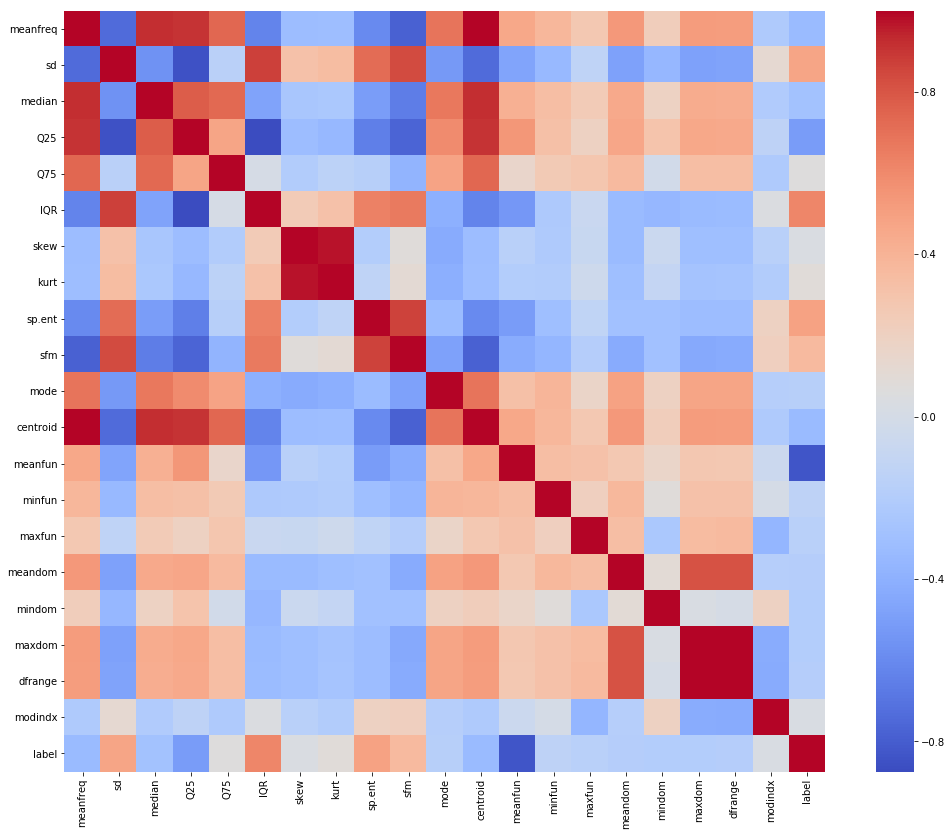

In [8]:
corr = dataset.corr()
plt.figure(figsize=(18,14))

print(round(corr,2))

sns.heatmap(corr, cbar = True, square = True, cmap='coolwarm')
plt.show()

In [122]:
logit_model2=sm.Logit(y2.astype(int),x2.astype(float))
#result2=logit_model2.fit()
r=logit_model2.fit(method='bfgs')
print(r.summary2())

         Current function value: 0.132489
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.809   
Dependent Variable: label            AIC:              695.9328
Date:               2019-09-25 16:46 BIC:              742.7336
No. Observations:   2566             Log-Likelihood:   -339.97 
Df Model:           7                LL-Null:          -1778.6 
Df Residuals:       2558             LLR p-value:      0.0000  
Converged:          0.0000           Scale:            1.0000  
----------------------------------------------------------------
           Coef.   Std.Err.     z      P>|z|    [0.025    0.975]
----------------------------------------------------------------
meanfreq  -0.0876    0.1589   -0.5514  0.5813   -0.3990   0.2238
kurt      -0.3669    0.1603   -2.2890  0.0221   -0.6811  -0.0527
meanfun   -6.1543    0.2945  -20.8948  0.0000   -6.731

C:\Users\Jigar_PAtel\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [11]:
#logit_model1=sm.Logit(y1.astype(int),x1.astype(float))
#result1=logit_model1.fit()
#print(result1.summary2())

0.9605678233438486


C:\Users\Jigar_PAtel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 15.0, 'Predicted label')

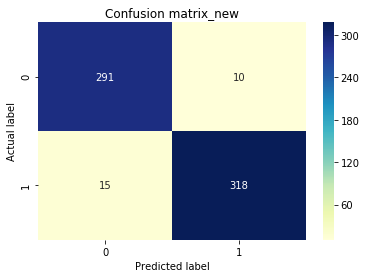

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train_new = sc.fit_transform(x_train_new)
x_test_new = sc.fit_transform(x_test_new)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier = LogisticRegression(random_state=0)

classifier.fit(x_train_new, y_train)
y_pred_new = classifier.predict(x_test_new)



from sklearn.metrics import confusion_matrix
cm_new = confusion_matrix(y_test, y_pred_new)
print(metrics.accuracy_score(y_test, y_pred_new))
sns.heatmap(pd.DataFrame(cm_new), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix_new', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')